In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [2]:
d_parse=lambda x:pd.datetime.strptime(x,'%m-%d-%YYYY')
df_sales=pd.read_csv('sales_data_sample.csv',encoding= 'unicode_escape')
df_sales['ORDERDATE']=pd.to_datetime(df_sales.ORDERDATE)
df_sales.shape

(2823, 25)

In [3]:
df_sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


###### Yearly Sales Performance of Store

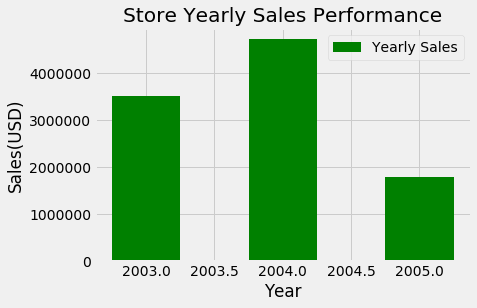

In [4]:
df_yearly_sales=pd.DataFrame(df_sales.groupby(pd.DatetimeIndex(df_sales['ORDERDATE']).year).sum()['SALES']
                            ).reset_index()
width=0.5
plt.style.use('fivethirtyeight')
plt.bar(df_yearly_sales['ORDERDATE'],df_yearly_sales['SALES'],label='Yearly Sales',width=width,color='green')
plt.title('Store Yearly Sales Performance')
plt.xlabel('Year')
plt.ylabel('Sales(USD)')
plt.legend()
plt.show()

###### Top 5 Selling Product

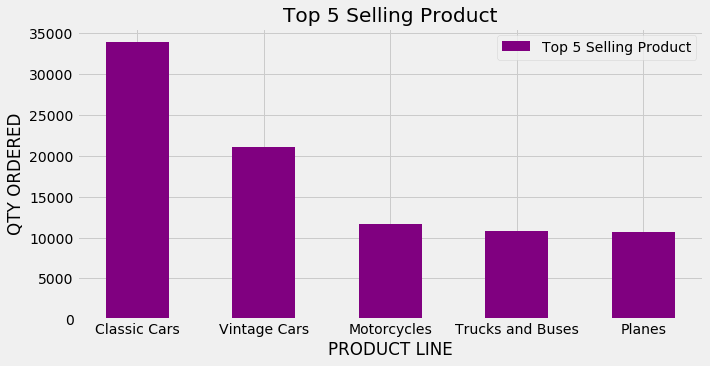

In [5]:
df_sales_pl=pd.DataFrame(df_sales.groupby('PRODUCTLINE').sum()['QUANTITYORDERED'].sort_values(ascending=False)).reset_index().head()
width=0.5
prod_line=[]
plt.style.use('fivethirtyeight')
for i in df_sales_pl['PRODUCTLINE']:
    prod_line.append(i)
prod_line    
x=np.arange(len(prod_line))
plt.figure(figsize=(10,5))
plt.bar(x,df_sales_pl['QUANTITYORDERED'],label='Top 5 Selling Product',width=width,color='purple')
plt.xticks(x,list(df_sales_pl['PRODUCTLINE']))
plt.title('Top 5 Selling Product')
plt.xlabel('PRODUCT LINE')
plt.ylabel('QTY ORDERED')
plt.legend()
plt.show()

###### Order Distribution By Order Status

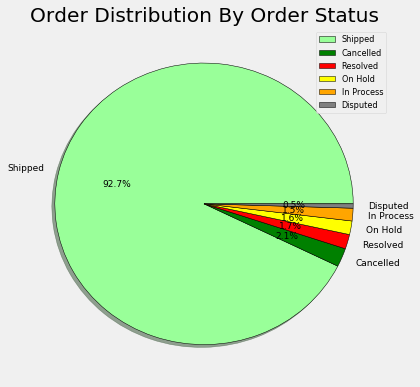

In [6]:
df_sales_os=pd.DataFrame(df_sales['STATUS'].value_counts()).reset_index()
df_sales_os.rename(columns={'index':'STATUS','STATUS':'COUNT'},inplace=True)
colors=['#99ff99','green','red','yellow','orange','grey']
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5.6,5.6))
plt.pie(df_sales_os.COUNT,labels=df_sales_os.STATUS,colors=colors,wedgeprops={'edgecolor':'black'},
              shadow=True,autopct='%1.1f%%',textprops={'fontsize': 9})
plt.title('Order Distribution By Order Status')
plt.tight_layout()
plt.legend(fontsize='xx-small')
plt.show()

###### Yearly Sale of Products

In [7]:
df_yp=df_sales[['YEAR_ID','PRODUCTLINE','QUANTITYORDERED']]
df=pd.pivot_table(df_yp,index=['YEAR_ID','PRODUCTLINE'],values='QUANTITYORDERED',aggfunc='sum')
df=df.rename(columns={'QUANTITYORDERED':'NUM OF PRODUCTS SOLD'})
df

NUM OF PRODUCTS SOLD
YEAR_ID PRODUCTLINE                           
2003    Classic Cars                     12473
        Motorcycles                       3739
        Planes                            2996
        Ships                             2844
        Trains                            1000
        Trucks and Buses                  4056
        Vintage Cars                      7504
2004    Classic Cars                     15418
        Motorcycles                       5690
        Planes                            5524
        Ships                             3937
        Trains                            1303
        Trucks and Buses                  5002
        Vintage Cars                      9950
2005    Classic Cars                      6101
        Motorcycles                       2234
        Planes                            2207
        Ships                             1346
        Trains                             409
        Trucks and Buses                  1719
        Vintage Cars                      3615

###### Top 5 Countries Contributing to Profits

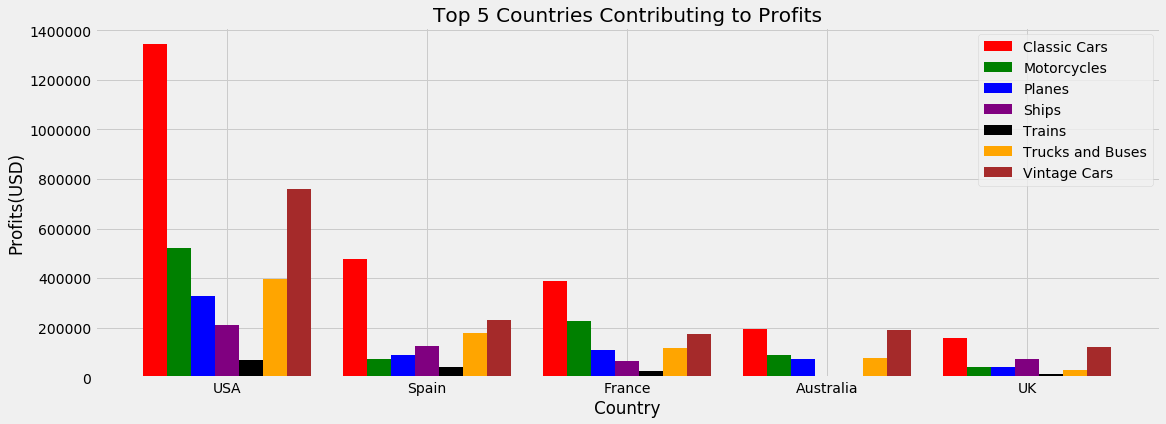

In [33]:
df_sales_cntry=df_sales.groupby(['COUNTRY','PRODUCTLINE']).sum()['SALES'].sort_values(ascending=False).reset_index()
df4=df_sales_cntry.pivot(index='COUNTRY',columns='PRODUCTLINE',values='SALES').fillna(0).sort_values(['Classic Cars','Motorcycles','Planes','Ships','Trains','Trucks and Buses','Vintage Cars'],ascending=False).head(5)
#df4
cc=list(df4['Classic Cars'])
mc=list(df4['Motorcycles'])
pl=list(df4['Planes'])
sh=list(df4['Ships'])
tr=list(df4['Trains'])
tb=list(df4['Trucks and Buses'])
vc=list(df4['Vintage Cars'])
df4.index
x = np.arange(len(df4.index.tolist())) 
x_indexes=np.arange(len(df4.index.tolist()))
width=0.12
plt.style.use('fivethirtyeight')
plt.figure(figsize=(17,6))
plt.bar(x_indexes-width-width-width,cc,width=width,color='red',label='Classic Cars')
plt.bar(x_indexes-width-width,mc,width=width,color='green',label='Motorcycles')
plt.bar(x_indexes-width,pl,width=width,color='blue',label='Planes')
plt.bar(x_indexes,sh,width=width,color='purple',label='Ships')
plt.bar(x_indexes+width,tr,width=width,color='black',label='Trains')
plt.bar(x_indexes+width+width,tb,width=width,color='orange',label='Trucks and Buses')
plt.bar(x_indexes+width+width+width,vc,width=width,color='brown',label='Vintage Cars')
plt.xticks(x, df4.index.tolist())
plt.title('Top 5 Countries Contributing to Profits')
plt.xlabel('Country')
plt.ylabel('Profits(USD)')
plt.legend()
plt.show()

###### Deal Size Classification based on Sales

In [27]:
df_deal_min=pd.DataFrame(df_sales.groupby('DEALSIZE').min()['SALES']).reset_index()
df_deal_min.rename(columns={'SALES':'MIN SALES'},inplace=True)
df_deal_max=pd.DataFrame(df_sales.groupby('DEALSIZE').max()['SALES']).reset_index()
df_deal_max.rename(columns={'SALES':'MAX SALES'},inplace=True)
df_deal_final=pd.merge(df_deal_min,df_deal_max,on='DEALSIZE')
df_deal_final


,DEALSIZE,MIN SALES,MAX SALES
0,Large,7016.31,14082.80
1,Medium,3002.40,6996.42
2,Small,482.13,2999.97
